In [2]:
import gymnasium as gym

observations = []
questions = []
env = gym.make("room_env:RoomEnv-v2")
(obs, question), info = env.reset()
observations.append(obs)
questions.append(question)

done = False
while True:
    (obs, question), reward, done, truncated, info = env.step(("foo", "stay"))
    observations.append(obs)
    questions.append(question)
    if done:
        break

/home/tk/.virtualenvs/human-memory/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:197: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.deprecation(
/home/tk/.virtualenvs/human-memory/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:210: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/home/tk/.virtualenvs/human-memory/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:156: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'tuple'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/home/tk/.virtualenvs/human-memory/lib/python3.9/site-packages/gymnasium/u

In [3]:
from explicit_memory.nn import LSTM

kwargs_lstm = {
    "hidden_size": 64,
    "num_layers": 2,
    "n_actions": 5,
    "embedding_dim": 32,
    "capacity": {"episodic": 16, "semantic": 16, "short": 16},
    "entities": env.entities,
    "relations": env.relations,
    "batch_first": True,
    "device": "cpu",
}

lstm = LSTM(**kwargs_lstm)

In [4]:
env.objects

{'static': [StaticObject(name: bed, location: bedroom),
  StaticObject(name: desk, location: officeroom),
  StaticObject(name: table, location: livingroom)],
 'independent': [IndependentObject(name: tae, location: livingroom, attached: []),
  IndependentObject(name: michael, location: bedroom, attached: []),
  IndependentObject(name: vincent, location: officeroom, attached: [])],
 'dependent': [DependentObject(name: laptop, location: livingroom, attached: None),
  DependentObject(name: phone, location: livingroom, attached: None),
  DependentObject(name: headset, location: bedroom, attached: None)],
 'agent': [Agent(name: agent, location: livingroom)]}

In [5]:
env.entities, env.relations

(['bed',
  'desk',
  'table',
  'tae',
  'michael',
  'vincent',
  'laptop',
  'phone',
  'headset',
  'agent',
  'officeroom',
  'livingroom',
  'bedroom',
  'wall'],
 ['north', 'east', 'south', 'west', 'atlocation'])

In [6]:
env.relations

['north', 'east', 'south', 'west', 'atlocation']

In [7]:
obj.name

NameError: name 'obj' is not defined

In [ ]:
objs

In [ ]:
observations

In [ ]:
questions

In [ ]:
import logging

logger = logging.getLogger()
logger.disabled = True

import numpy as np
from tqdm.auto import tqdm

from agent import HandcraftedAgent


capacity = {"episodic": 16, "semantic": 16, "short": 16}

config = {
    "question_prob": 1.0,
    "seed": 42,
    "terminates_at": 99,
}

results = {}

for memory_management_policy in ["random", "generalize"]:
    for qa_policy in ["random", "episodic_semantic"]:
        for explore_policy in ["random", "avoid_walls"]:
            key = (memory_management_policy, qa_policy, explore_policy)
            if key not in results:
                results[key] = []
            print(
                memory_management_policy,
                qa_policy,
                explore_policy,
            )

            for seed in tqdm([0, 1, 2, 3, 4]):
                config["seed"] = seed

                agent = HandcraftedAgent(
                    env_str="room_env:RoomEnv-v2",
                    env_config=config,
                    memory_management_policy=memory_management_policy,
                    qa_policy=qa_policy,
                    explore_policy=explore_policy,
                    num_samples_for_results=10,
                    capacity=capacity,
                )
                agent.test()
                to_append = (np.mean(agent.scores), np.std(agent.scores))
                print(to_append)
                results[key].append(to_append)

random random random


  0%|          | 0/5 [00:00<?, ?it/s]

(12.6, 14.00142849854971)
(14.2, 12.014990636700473)
(14.4, 12.547509713086498)
(9.0, 11.532562594670797)
(10.6, 10.809255293497328)
random random avoid_walls


  0%|          | 0/5 [00:00<?, ?it/s]

(12.6, 14.00142849854971)
(14.2, 12.014990636700473)
(14.4, 12.547509713086498)
(9.0, 11.532562594670797)
(10.6, 10.809255293497328)
random episodic_semantic random


  0%|          | 0/5 [00:00<?, ?it/s]

(50.2, 6.660330322138685)
(47.4, 10.200000000000001)
(47.6, 13.763720427268202)
(58.4, 14.192955999368138)
(47.6, 9.200000000000001)
random episodic_semantic avoid_walls


  0%|          | 0/5 [00:00<?, ?it/s]

(50.2, 6.660330322138685)
(47.4, 10.200000000000001)
(47.6, 13.763720427268202)
(58.4, 14.192955999368138)
(47.6, 9.200000000000001)
generalize random random


  0%|          | 0/5 [00:00<?, ?it/s]

(25.0, 12.938315191708694)
(19.6, 9.499473669630333)
(22.0, 13.711309200802088)
(20.4, 8.380930735902785)
(17.8, 14.406942770761603)
generalize random avoid_walls


  0%|          | 0/5 [00:00<?, ?it/s]

(33.4, 10.509043724335722)
(34.4, 9.58331884056875)
(27.8, 10.13706071797935)
(35.0, 11.46298390472568)
(34.4, 12.41933975700802)
generalize episodic_semantic random


  0%|          | 0/5 [00:00<?, ?it/s]

(61.4, 10.239140588936163)
(57.2, 6.997142273814361)
(60.6, 10.883014288330234)
(56.4, 14.079772725438433)
(62.8, 7.6000000000000005)
generalize episodic_semantic avoid_walls


  0%|          | 0/5 [00:00<?, ?it/s]

(68.0, 7.155417527999327)
(67.4, 7.323933369440223)
(62.6, 4.565084884205331)
(65.6, 8.333066662399863)
(70.2, 8.411896337925235)


In [ ]:
for key, val in results.items():
    print(
        key,
        "\t\t\t\t",
        round(np.mean([v[0] for v in val]), 2),
        round(np.std([v[0] for v in val]), 2),
    )

('random', 'random', 'random') 				 12.16 2.09
('random', 'random', 'avoid_walls') 				 12.16 2.09
('random', 'episodic_semantic', 'random') 				 50.24 4.21
('random', 'episodic_semantic', 'avoid_walls') 				 50.24 4.21
('generalize', 'random', 'random') 				 20.96 2.43
('generalize', 'random', 'avoid_walls') 				 33.0 2.65
('generalize', 'episodic_semantic', 'random') 				 59.68 2.47
('generalize', 'episodic_semantic', 'avoid_walls') 				 66.76 2.55


In [ ]:
agent.memory_systems

In [5]:
foo = {"foo": 1}
bar = foo.copy()
bar["foo"] = 2

foo, bar

({'foo': 1}, {'foo': 2})

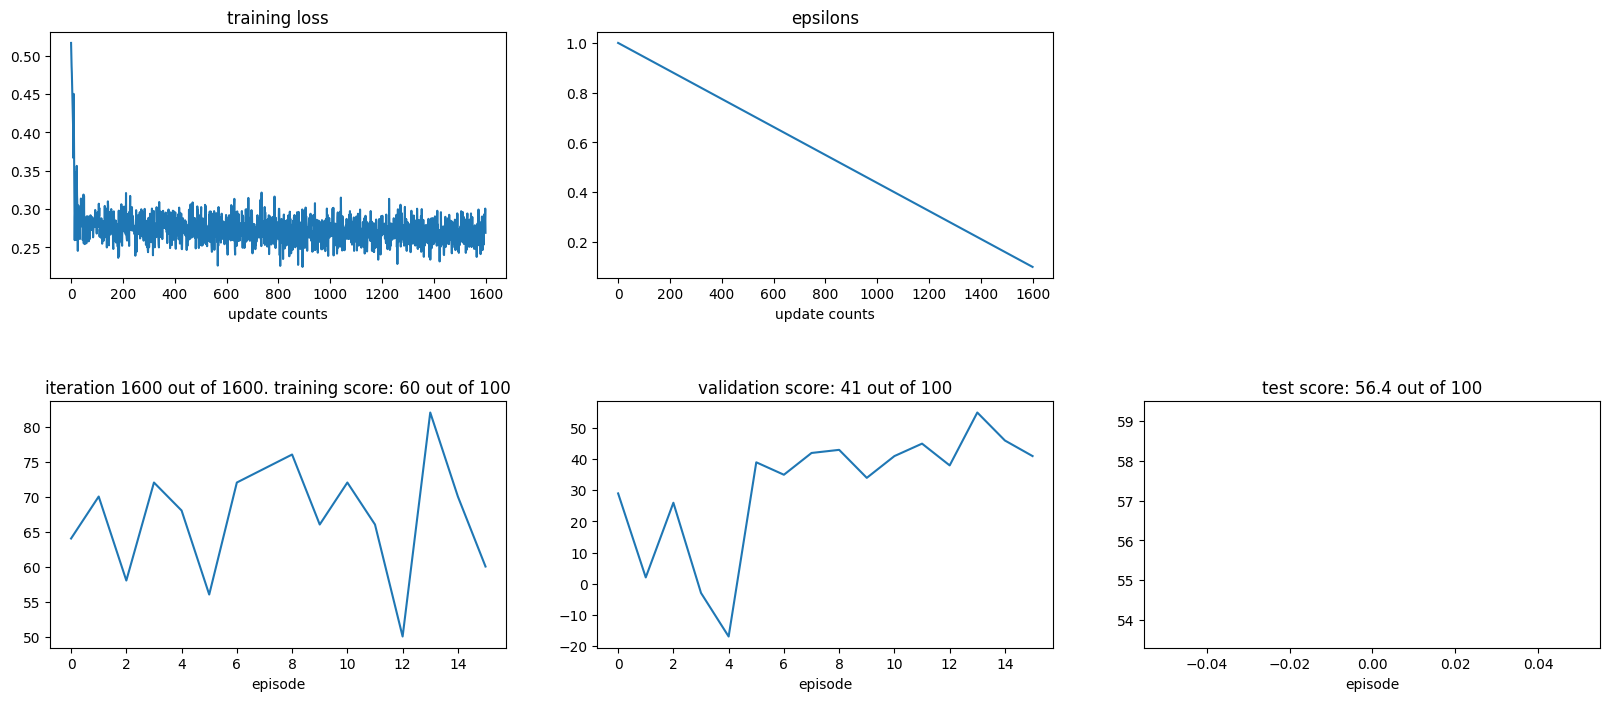

In [1]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent import DQNAgent

for pretrain_semantic in [True, False]:
    for test_seed in [0, 1, 2, 3, 4]:
        # parameters
        all_params = {
            "env_str": "room_env:RoomEnv-v2",
            "max_epsilon": 1.0,
            "min_epsilon": 0.1,
            "epsilon_decay_until": 100 * 16,
            "gamma": 0.65,
            "capacity": {"episodic": 16, "semantic": 16, "short": 16},
            "nn_params": {
                "hidden_size": 64,
                "num_layers": 2,
                "n_actions": 5,
                "embedding_dim": 32,
                "v1_params": None,
                "v2_params": {},
            },
            "num_iterations": 100 * 16,
            "replay_buffer_size": 1024 * 100,
            "warm_start": 1024 * 100,
            "batch_size": 1024,
            "target_update_rate": 10,
            "pretrain_semantic": pretrain_semantic,
            "run_validation": True,
            "run_test": True,
            "num_samples_for_results": 10,
            "train_seed": test_seed + 5,
            "plotting_interval": 10,
            "device": "cpu",
            "test_seed": test_seed,
        }

        agent = DQNAgent(**all_params)
        agent.train()